In [83]:

!wget https://raw.githubusercontent.com/iff5sigma/statisticsML/main/Classification/AdultIncome.csv

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K
...,...,...,...,...,...,...,...,...
19782,53,Private,Masters,Married,White,Male,40,>50K
19783,22,Private,Some-college,Never-married,White,Male,40,<=50K
19784,40,Private,HS-grad,Married,White,Male,40,>50K
19785,58,Private,HS-grad,Widowed,White,Female,40,<=50K


In [ ]:
"""
#---------------------------- Analize data ------------------------------------
"""
import pandas as pd
data = pd.read_csv('AdultIncome.csv')

#verifica valori nulli
data.isnull().sum(axis = 0)   # ok
data

In [84]:
from sklearn.preprocessing import LabelEncoder
df = data.copy()
# Pre-elaborazione dei dati: codifica delle variabili categoriche
label_encoders = {}
for column in ['wc', 'education', 'marital status', 'race', 'gender', 'IncomeClass']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,3,2,0,4,1,40,0
1,28,3,0,3,2,0,40,0
2,37,3,3,3,4,0,40,0
3,31,3,3,1,4,0,50,1
4,42,3,0,3,4,1,40,1
...,...,...,...,...,...,...,...,...
19782,53,3,3,3,4,1,40,1
19783,22,3,6,1,4,1,40,0
19784,40,3,2,3,4,1,40,1
19785,58,3,2,2,4,0,40,0


In [85]:
column = df.columns

# lista delle features esclusa la label
features = column[:-1].to_list() 
label = 'IncomeClass'


print('features:', features)
print('label:', label)

features: ['age', 'wc', 'education', 'marital status', 'race', 'gender', 'hours per week']
label: IncomeClass


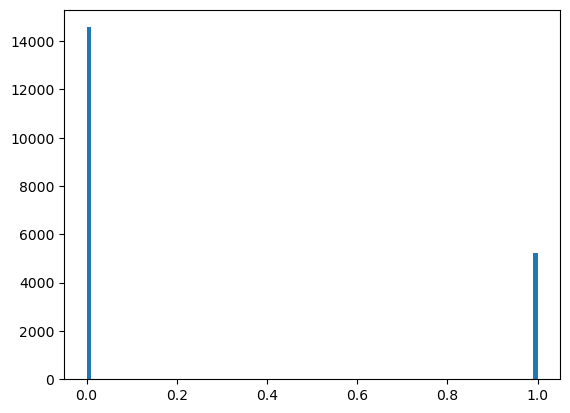

0    14575
1     5212
Name: IncomeClass, dtype: int64

In [86]:
import matplotlib.pyplot as plt
# verifica dataset bilanciato con un semplice hist
plt.hist(df[label].values, bins = 100)
plt.show()

df[label].value_counts()



In [87]:

from sklearn.model_selection import train_test_split


""" ---------------------- train_test_split --------------------------------"""

X, y = df[features].values, df[label].values
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3,
                                                           random_state = 0, stratify = y)

In [88]:


""" -------------------------- First - Model -------------------------------------"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
print('Model:', model_tree)

""" --------------------- Predict and comparation -------------------------"""
# Predizione sul test set
y_pred = model_tree.predict(X_test)

# Predizione delle probabilità
y_prob = model_tree.predict_proba(X_test)

# Creazione del DataFrame con i risultati
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability <=50K': y_prob[:, 0],
    'Probability >50K': y_prob[:, 1]
})
df_pred

Model: DecisionTreeClassifier()


,Actual,Predicted,Probability <=50K,Probability >50K
0,0,0,1.000000,0.000000
1,1,0,1.000000,0.000000
2,0,0,1.000000,0.000000
3,0,0,1.000000,0.000000
4,0,0,1.000000,0.000000
...,...,...,...,...
5932,1,0,1.000000,0.000000
5933,0,0,1.000000,0.000000
5934,0,0,0.545455,0.454545
5935,0,0,1.000000,0.000000


In [89]:
#vediamo le previsioni errate
df_pred[df_pred['Actual']!= df_pred['Predicted']]

,Actual,Predicted,Probability <=50K,Probability >50K
1,1,0,1.000000,0.000000
18,0,1,0.333333,0.666667
20,1,0,0.526316,0.473684
21,0,1,0.400000,0.600000
32,1,0,0.666667,0.333333
...,...,...,...,...
5912,1,0,0.500000,0.500000
5921,1,0,1.000000,0.000000
5930,1,0,1.000000,0.000000
5932,1,0,1.000000,0.000000


In [90]:


""" --------------------- Metrics and Validation model --------------------"""

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score


#----- alcune metriche di classificazione --------
report = classification_report(y_pred, y_test) 
print('--------- REPORT ---------', report)
cm = confusion_matrix(y_pred, y_test)
print('--------- CM ---------', report)


--------- REPORT ---------               precision    recall  f1-score   support

           0       0.88      0.83      0.85      4629
           1       0.49      0.59      0.54      1308

    accuracy                           0.78      5937
   macro avg       0.69      0.71      0.70      5937
weighted avg       0.79      0.78      0.78      5937

--------- CM ---------               precision    recall  f1-score   support

           0       0.88      0.83      0.85      4629
           1       0.49      0.59      0.54      1308

    accuracy                           0.78      5937
   macro avg       0.69      0.71      0.70      5937
weighted avg       0.79      0.78      0.78      5937



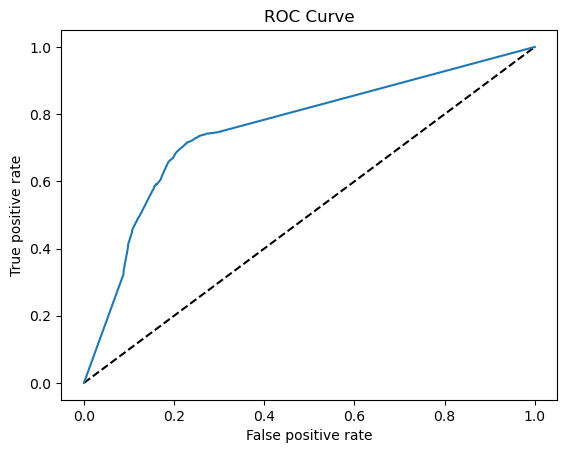

In [91]:

fpr, tpr, soglia = roc_curve(y_test, y_prob[:,1])

fig = plt.figure()
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

# ------ valore dell'area che sottende la curva roc -------
# il valore ideale è 1
AUC = roc_auc_score(y_test, y_prob[:,1])


------------- metrics Decision Tree --------------
REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4632
           1       0.50      0.59      0.54      1305

    accuracy                           0.78      5937
   macro avg       0.69      0.71      0.70      5937
weighted avg       0.79      0.78      0.78      5937

CONFUSIONE MATRIX
[[3843  789]
 [ 530  775]]
--------------------------------------------------------- 


------------- metrics Random_forest --------------
REPORT: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4632
           1       0.50      0.59      0.54      1305

    accuracy                           0.78      5937
   macro avg       0.69      0.71      0.70      5937
weighted avg       0.79      0.78      0.78      5937

CONFUSIONE MATRIX
[[3843  789]
 [ 530  775]]
--------------------------------------------------------- 


------------- 

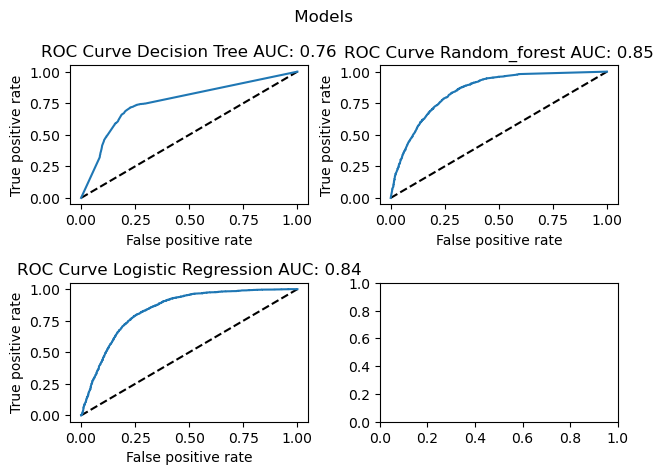

In [92]:
  
""" ------------------------ ALTRI ALGORITMI..... --------------------------"""

#definiamo la funzione metrics che restituisce le metriche degli algormti usati

def metrics(name_algoritmo, y_test, y_pred):
    report = classification_report(y_pred, y_test) 
    cm = confusion_matrix(y_pred, y_test)
    print("------------- metrics " + name_algoritmo +" --------------")
    print('REPORT: ')
    print(report)
    print('CONFUSIONE MATRIX')
    print(cm)
    print("--------------------------------------------------------- ")
    print('\n')
    

def scatter(names_algoritmi, y_test, lista_y_proba):
    fig, ax = plt.subplots(2,2)
    fig.suptitle(' Models ')
    ax = ax.flatten()
    i = -1
    for y_proba, names in zip(lista_y_proba, names_algoritmi):
        i += 1
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, soglia = roc_curve(y_test, y_proba)

        
        ax[i].plot([0,1], [0,1],'k--')
        ax[i].plot(fpr, tpr)
        ax[i].set_xlabel('False positive rate')
        ax[i].set_ylabel('True positive rate')
        ax[i].set_title('ROC Curve ' + names + ' AUC: ' + str(round(auc,2)) )
    fig.tight_layout()
    plt.show()


""" ----------------------- implementig model ---------------------------- """

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_tree = decision_tree.predict(X_test)
y_tree_proba = decision_tree.predict_proba(X_test)


forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)
y_forest = decision_tree.predict(X_test)
y_forest_proba = forest_classifier.predict_proba(X_test)


rate = 0.01
logistic = LogisticRegression(C = 1/rate, solver = 'liblinear')
logistic.fit(X_train, y_train)
y_regression = logistic.predict(X_test)
y_regression_proba = logistic.predict_proba(X_test)

# svc = SVC()
# svc.fit(X_train, y_train)
# y_svc = svc.predict(X_test)

pred_proba = [y_tree_proba[:,1], y_forest_proba[:,1], y_regression_proba[:,1] ]
pred = [y_tree, y_forest, y_regression]
name_alg = ['Decision Tree', 'Random_forest','Logistic Regression']


for name_algoritmo, y_predict in zip(name_alg, pred):
    metrics(name_algoritmo, y_test, y_predict)
     
scatter(name_alg, y_test, pred_proba)
